#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A">Practica 2: Datos de propinas: Ibarra Ramírez Sergio </font>

In [ ]:
pip install seaborn

Primero importamos la data de tips 

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Exploramos las relaciones entre los datos 

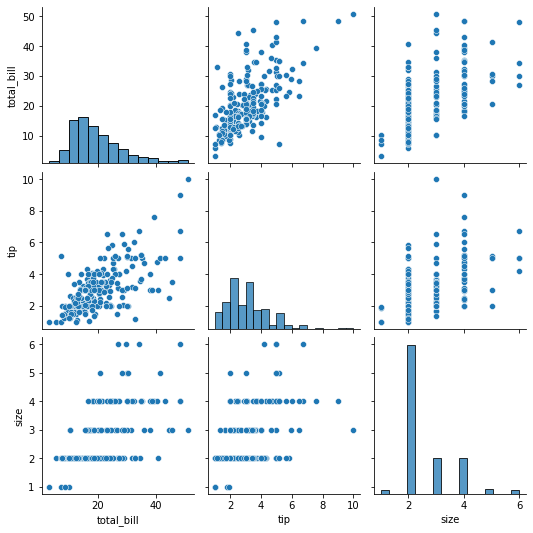

In [2]:
sns.pairplot(tips)

Exploramos los coefricientes de correlación lineales en los daos 

<AxesSubplot:>

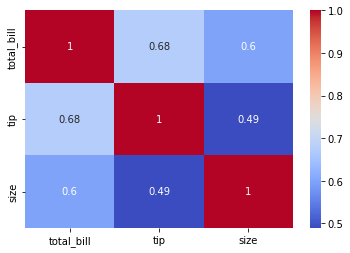

In [3]:

corr_matrix_tips = tips.corr()  # Calculate correlation matrix
sns.heatmap(corr_matrix_tips, annot=True, cmap="coolwarm")

Separamos la variable dependiente Y(en este caso tip) de las dependientes 

In [4]:


y_tips = tips["tip"]
y_tips


0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [12]:
X_tips = tips.drop(["tip","sex","smoker", "day", "time"],axis=1)
X_tips

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4
...,...,...
239,29.03,3
240,27.18,2
241,22.67,2
242,17.82,2


Ahora separamos los datos en train y test con un test size de 0.2 

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_tips_train, X_tips_test, y_tips_train, y_tips_test = train_test_split(X_tips,y_tips,test_size=0.2,random_state=2023)

Aplicación del modelo linerRegression()

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
modelo_lineal = LinearRegression()

Se entrena al modelo con model.fit(X_train,y_train)

In [18]:
modelo_lineal_simple_tips = modelo_lineal.fit(X_tips_train,y_tips_train)
modelo_lineal_simple_tips

LinearRegression()

In [19]:
modelo_lineal_simple_tips.coef_

array([0.10061796, 0.12714613])

Ahora vamos a predecir usando el modelo de LinearRegression

In [20]:
y_pred_modelo_lineal_simple_tips = modelo_lineal_simple_tips.predict(X_tips_test)
y_pred_modelo_lineal_simple_tips

array([3.17822666, 3.66320521, 1.89561889, 1.99221213, 3.27079518,
       1.69035826, 2.69653782, 2.32425138, 1.97410089, 3.79400855,
       5.51923899, 2.05861998, 2.71904127, 3.39794131, 2.18841714,
       1.51327066, 3.19761524, 2.00629864, 5.0859431 , 3.9828028 ,
       2.12905255, 2.62711143, 3.17584679, 4.89449782, 2.61101255,
       4.67542184, 2.25583117, 3.73729499, 4.6670049 , 2.92896529,
       2.33733171, 3.67957524, 2.54259234, 2.53957381, 2.44801147,
       2.04352728, 2.21659017, 1.66419759, 2.97021866, 2.92795911,
       2.23268904, 2.67440187, 2.10124702, 3.0433986 , 2.45002382,
       3.25469631, 2.24275084, 4.37960505, 2.67577555])

Calculando el error producido por el modelo 

In [21]:
from sklearn.metrics import mean_absolute_error

# Assuming you have y_test and y_pred_modelo1 as the true labels and predicted labels, respectively
mae_modelo_lineal_simple_tips = mean_absolute_error(y_tips_test, y_pred_modelo_lineal_simple_tips)

print("Mean Absolute Error:", mae_modelo_lineal_simple_tips)

Mean Absolute Error: 0.739090563561639


Vamos a itentar plotear los resiuos del modelo 

NameError: name 'y' is not defined

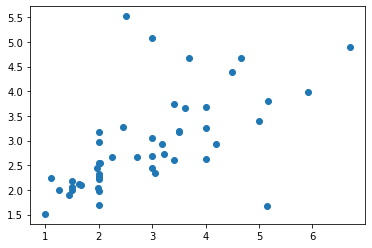

In [22]:
import matplotlib.pyplot as plt


# Plot predicted values versus true values
plt.scatter(y_tips_test, y_pred_modelo_lineal_simple_tips)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')  # Add a diagonal line for reference
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Values versus True Values')
plt.show()

# Plot residuals
residuals = y_tips_test - y_pred_modelo_lineal_simple_tips# Calculate residuals
plt.scatter(y_pred_modelo_lineal_simple_tips, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals')
plt.show()

Ahora intentamos aplicar elmodelo Intentando el modelo sm.OLS

In [23]:
import statsmodels.api as sm

# Assuming you have already fitted a linear regression model called "modelo_linea_entrenado1"
lineal_tips2 = sm.OLS(y_tips_train, X_tips_train)  # Specify the model with dependent variable y and independent variable(s) X
modelo_lineal_tips_2 = lineal_tips2.fit()  # Fit the model

# Generate the summary of the model
print(modelo_lineal_tips_2.summary())


                                 OLS Regression Results                                
Dep. Variable:                    tip   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              916.0
Date:                Fri, 09 Jun 2023   Prob (F-statistic):                    3.05e-99
Time:                        16:37:52   Log-Likelihood:                         -282.07
No. Observations:                 195   AIC:                                      568.1
Df Residuals:                     193   BIC:                                      574.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
X_tips2 = tips.drop(["tip"],axis=1)
X_tips2

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,Male,No,Sat,Dinner,3
240,27.18,Female,Yes,Sat,Dinner,2
241,22.67,Male,Yes,Sat,Dinner,2
242,17.82,Male,No,Sat,Dinner,2


In [25]:
X_tips_train2, X_tips_test2, y_tips_train2, y_tips_test2 = train_test_split(X_tips2,y_tips,test_size=0.2,random_state=2023)

In [26]:
import statsmodels.api as sm

# Assuming you have already fitted a linear regression model called "modelo_linea_entrenado1"
lineal_tips2_2 = sm.OLS(y_tips_train2, X_tips_train2)  # Specify the model with dependent variable y and independent variable(s) X
modelo_lineal_tips_2_2 = lineal_tips2_2.fit()  # Fit the model

# Generate the summary of the model
print(modelo_lineal_tips_2_2.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).